In this exercise, we will be doing PCA for ratings of places in the US.

The data is taken from the Places Rated Almanac, by Richard Boyer and David Savageau, copyrighted and published by Rand McNally. The nine rating criteria used by Places Rated Almanac are:

1. Climate & Terrain
2. Housing
3. Health Care & Environment
4. Crime
5. Transportation
6. Education
7. The Arts
8. Recreation
9. Economics

For all but two of the above criteria, the higher the score, the better. For Housing and Crime, the lower the score the better. (see the Places Rated Almanac for more details)

In [ ]:
#import the "places.csv" file as a pandas dataframe and look at the first few rows of the dataframe

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('places.csv')
df.head()

,Name,Climate,HousingCost,HlthCare,Crime,Transp,Educ,Arts,Recreat,Econ
0,AbileneTX,521,6200,237,923,4031,2757,996,1405,7633
1,AkronOH,575,8138,1656,886,4883,2438,5564,2632,4350
2,AlbanyGA,468,7339,618,970,2531,2560,237,859,5250
3,Albany-Schenectady-TroyNY,476,7908,1431,610,6883,3399,4655,1617,5864
4,AlbuquerqueNM,659,8393,1853,1483,6558,3026,4496,2612,5727


In [ ]:
# dimension of the dataset

In [24]:
df.shape

(329, 10)

In [ ]:
# compute the correlation between the features

In [28]:
df.corr(numeric_only=True)

,Climate,HousingCost,HlthCare,Crime,Transp,Educ,Arts,Recreat,Econ
Climate,1.000000,0.386291,0.213303,0.192387,0.079120,0.064520,0.226974,0.213509,-0.100083
HousingCost,0.386291,1.000000,0.453010,0.134222,0.271922,0.197934,0.448568,0.422288,0.269433
HlthCare,0.213303,0.453010,1.000000,0.304659,0.470317,0.490234,0.865796,0.325397,0.069271
Crime,0.192387,0.134222,0.304659,1.000000,0.286578,0.074416,0.389483,0.344627,0.259995
Transp,0.079120,0.271922,0.470317,0.286578,1.000000,0.335992,0.464806,0.364716,0.059247
Educ,0.064520,0.197934,0.490234,0.074416,0.335992,1.000000,0.373279,0.077807,0.119700
Arts,0.226974,0.448568,0.865796,0.389483,0.464806,0.373279,1.000000,0.378659,0.075673
Recreat,0.213509,0.422288,0.325397,0.344627,0.364716,0.077807,0.378659,1.000000,0.173531
Econ,-0.100083,0.269433,0.069271,0.259995,0.059247,0.119700,0.075673,0.173531,1.000000


In [ ]:
# Scale the data: You can use the scale() function from preprocessing library
# convert the scaled array to a dataframe

In [30]:
from sklearn.preprocessing import scale

scaled_data = scale(df.select_dtypes(include='number'))
scaled_df = pd.DataFrame(scaled_data, columns=df.select_dtypes(include='number').columns)
scaled_df.head()

,Climate,HousingCost,HlthCare,Crime,Transp,Educ,Arts,Recreat,Econ
0,-0.147006,-0.901297,-0.947340,-0.106712,-0.123592,-0.180726,-0.464893,-0.546646,1.946433
1,0.300664,-0.087570,0.469568,-0.210467,0.464411,-1.176652,0.520604,0.974442,-1.085467
2,-0.586386,-0.423054,-0.566902,0.025084,-1.158809,-0.795765,-0.628640,-1.223512,-0.254304
3,-0.520064,-0.184142,0.244900,-0.984419,1.844699,1.823613,0.324497,-0.283834,0.312735
4,0.997040,0.019500,0.666278,1.463626,1.620402,0.659098,0.290194,0.949648,0.186213


In [ ]:
# Now apply PCA and extract the loadings

In [34]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(scaled_df)

loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(len(scaled_df.columns))], index=scaled_df.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
Climate,0.206414,0.217835,0.689956,0.137321,-0.369150,-0.374605,-0.084706,-0.362308,0.001391
HousingCost,0.356522,0.250624,0.208172,0.511829,0.233488,0.141640,-0.230639,0.613855,0.013600
HlthCare,0.460215,-0.299465,0.007325,0.014702,-0.103241,0.373848,0.013868,-0.185676,-0.716355
Crime,0.281298,0.355342,-0.185105,-0.539050,-0.523940,-0.080923,0.018606,0.430025,-0.058608
Transp,0.351151,-0.179604,-0.146376,-0.302904,0.404348,-0.467592,-0.583391,-0.093599,0.003629
Educ,0.275293,-0.483382,-0.229703,0.335411,-0.208819,-0.502170,0.426182,0.188668,0.110840
Arts,0.463054,-0.194790,0.026484,-0.101080,-0.105098,0.461881,-0.021525,-0.203990,0.685758
Recreat,0.327888,0.384475,0.050853,-0.189801,0.529541,-0.089916,0.627878,-0.150596,-0.025506
Econ,0.135412,0.471283,-0.607314,0.421770,-0.159620,-0.032608,-0.149741,-0.404809,0.000438


In [ ]:
# compute the principal components and store them in a dataframe

In [36]:
principal_components = pca.transform(scaled_df)
pc_df = pd.DataFrame(principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])
pc_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-1.041764,0.895130,-1.438842,0.510611,-0.565997,-0.498613,-0.424397,-1.003302,0.347934
1,0.440484,0.075181,1.156475,-1.113901,0.998402,0.629504,-0.011913,-0.419384,-0.121871
2,-1.878396,0.069898,-0.073458,-0.046302,-0.680559,0.715184,-0.239859,0.442570,-0.094344
3,0.912129,-1.820351,-1.097817,0.574454,0.770251,-1.273173,-0.459415,-0.372062,0.317760
4,2.152521,0.329359,-0.019768,-1.033073,-0.238913,-1.286180,-0.154779,-0.148490,-0.307621


In [ ]:
# How to interprent the principal components? In class we used a simple method to look at the coefficents.
# Here we will use a slightly different method.
# We will compute the correlations between the principal components and the original features

In [ ]:
# We can use the function corrwith to find the correlation between PC1 and all the columns in df
# Here's an example below:

In [40]:
# Assuming that the dataset is called df, and the prinicpal components are stored in
# the dataset prinicipal_components, the following code 
# computes the correlation between PC1 and all the features

correlations_with_pc1 = scaled_df.corrwith(pc_df['PC1'], axis=0)
correlations_with_pc1

Climate        0.381072
HousingCost    0.658194
HlthCare       0.849628
Crime          0.519321
Transp         0.648279
Educ           0.508233
Arts           0.854871
Recreat        0.605332
Econ           0.249992
dtype: float64

In [ ]:
# We can also plot the absolute value of the correlations

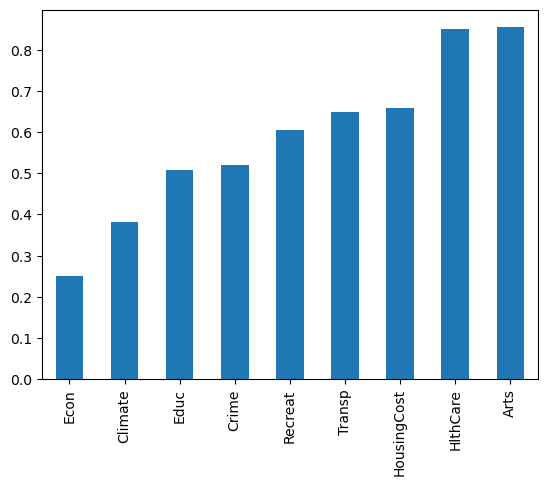

In [42]:
scaled_df.corrwith(pc_df['PC1'], axis=0).sort_values().plot(kind="bar")
plt.show()

In [ ]:
# As an example in the above plot, We can see that PC1 is highly correlated with 
# Arts, Heatlhcare, Housing Cost, transportation and Recreation scores. So a high PC! score implies 
# high score on these four scores.

In [ ]:
# Now you can repeat the same process to find the most correlated 
# features with PC2

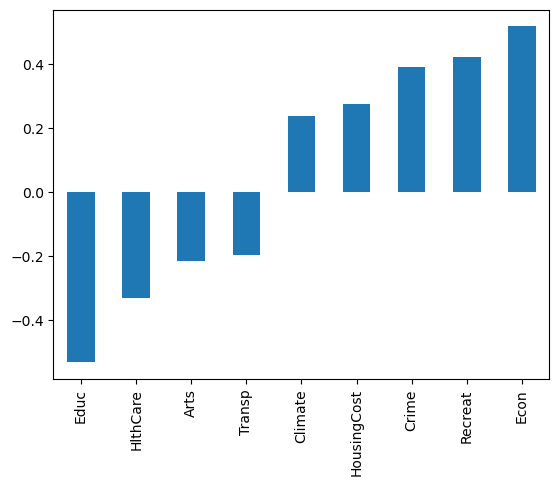

In [44]:
scaled_df.corrwith(pc_df['PC2'], axis=0).sort_values().plot(kind="bar")
plt.show()


In [ ]:
# create the scree plot to see how much variance is explained by each PC

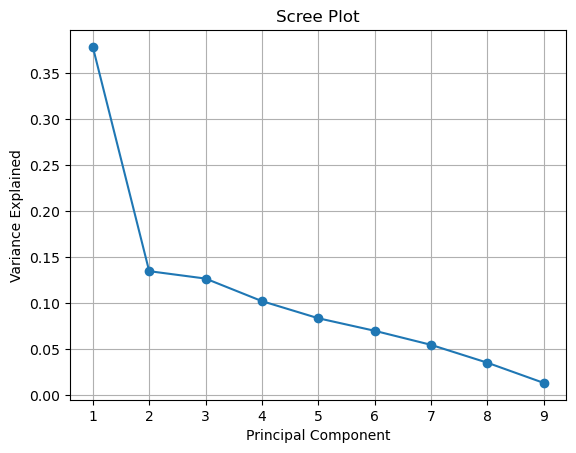

In [46]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

In [ ]:
# How many PC's do you need to use to get upto 90% explained variance?


In [48]:
import numpy as np

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
num_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
num_components_90

7

In [ ]:
# Principal components can be also used for visualization. In the next few lines, we will 
# fit a k means clustering using the original scaled features, 
# but plot the clusters in 2 dimensions using the principal components

In [ ]:
# import the K means library

In [50]:
from sklearn.cluster import KMeans

In [ ]:
#Use the scaled features and fit a KMeans with 3 clusters to get the labels of each point

In [52]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(scaled_df)
labels

C:\Users\TUE40094\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


array([0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 2, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0,
       0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0,
       2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 1, 0, 0, 2, 1, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2,
       0, 0, 0, 2, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0,
       1, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0,
       0, 0, 0, 2, 0, 2, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 1, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 0,
       0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0,
       2, 0, 0, 0, 2, 0, 0, 1, 0, 2, 1, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 1,
       1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0,
       2, 2, 0, 1, 0, 0, 0, 2, 1, 0, 2, 0, 0, 2, 0,

In [ ]:
# Now create a scatter plot of the clusters using the first two features. 
# i.e. the X axis should be the Climate, y axis the housing cost and color each point by the label
# generated by the clustering algorithm

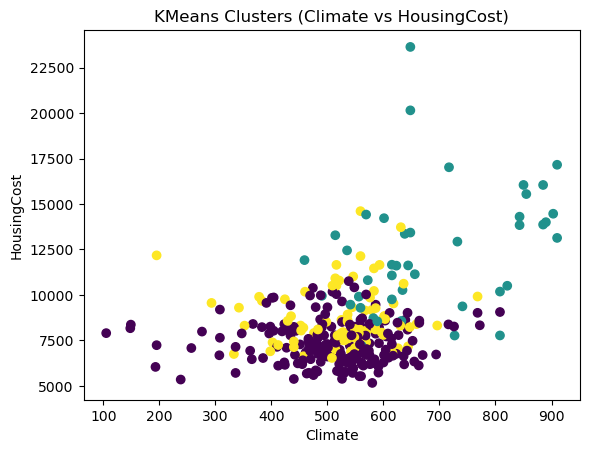

In [60]:
plt.scatter(df['Climate'], df['HousingCost'], c=labels, cmap='viridis')
plt.xlabel('Climate')
plt.ylabel('HousingCost')
plt.title('KMeans Clusters (Climate vs HousingCost)')
plt.show()

In [ ]:
# Now repeat the process to visulize the clusters
# but this time use the first 2 principal components on the x and y axis,
# instead of using the original features.
# Do you see any difference in the visulaztion of the clusters from using the principal components
# vs using the original features?

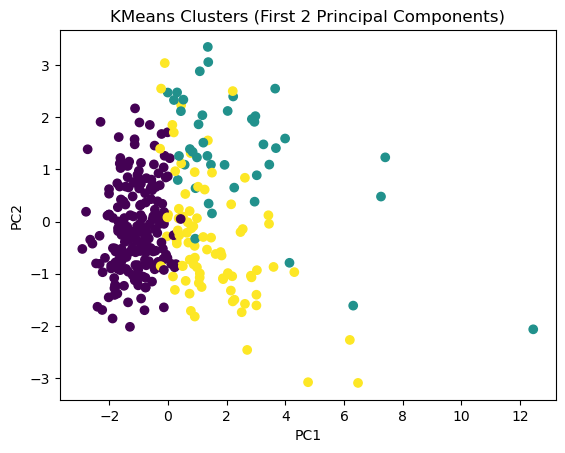

In [62]:
plt.scatter(pc_df['PC1'], pc_df['PC2'], c=labels, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans Clusters (First 2 Principal Components)')
plt.show()


Yes, there is a noticeable difference. When using the original features like Climate and HousingCost, the clusters are less distinct and may overlap since those features capture only part of the overall variation. Also using the first two principal components provides a clearer separation between clusters.